In [1]:
#import required libraries

import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load data
df = pd.read_csv(r'C:\Users\dines\OneDrive\Desktop\job preparation\eli tech\Global_AI_Content_Impact_Dataset.csv')
print("=== RAW DATASET HEAD ===")
print(df.head())

=== RAW DATASET HEAD ===
       Country  Year    Industry  AI Adoption Rate (%)  \
0  South Korea  2022       Media                 44.29   
1        China  2025       Legal                 34.75   
2          USA  2022  Automotive                 81.06   
3       France  2021       Legal                 85.24   
4       France  2021      Gaming                 78.95   

   AI-Generated Content Volume (TBs per year)  Job Loss Due to AI (%)  \
0                                       33.09                   16.77   
1                                       66.74                   46.89   
2                                       96.13                   10.66   
3                                       93.76                   27.70   
4                                       45.62                   17.45   

   Revenue Increase Due to AI (%)  Human-AI Collaboration Rate (%)  \
0                           46.12                            74.79   
1                           52.46              

In [4]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()


In [5]:
# Analyze Regulation Status sentiment
df['Regulation_Sentiment'] = df['Regulation Status'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

print("\n=== SENTIMENT ANALYSIS RESULTS ===")
print(df[['Country', 'Regulation Status', 'Regulation_Sentiment']].head(10))


=== SENTIMENT ANALYSIS RESULTS ===
       Country Regulation Status  Regulation_Sentiment
0  South Korea            Strict                0.0000
1        China            Strict                0.0000
2          USA          Moderate                0.0000
3       France          Moderate                0.0000
4       France            Strict                0.0000
5          USA           Lenient                0.2732
6    Australia          Moderate                0.0000
7           UK          Moderate                0.0000
8       Canada          Moderate                0.0000
9        China          Moderate                0.0000


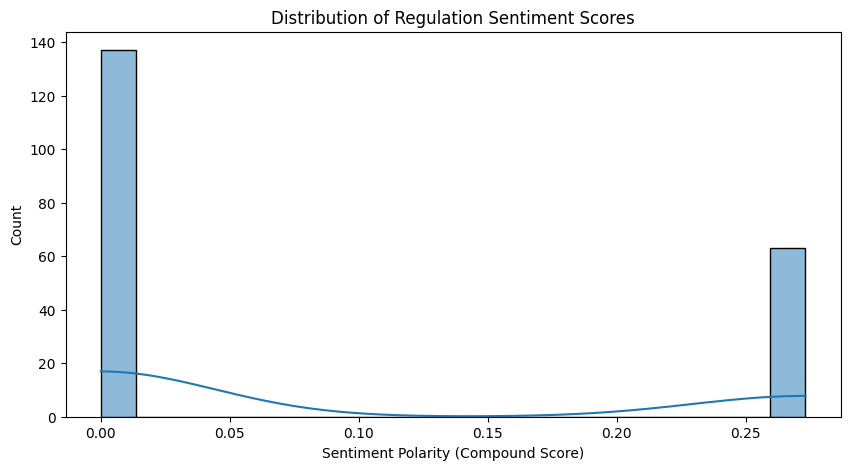

In [6]:
# Visualization 1: Sentiment Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Regulation_Sentiment'], bins=20, kde=True)
plt.title('Distribution of Regulation Sentiment Scores')
plt.xlabel('Sentiment Polarity (Compound Score)')
plt.show()

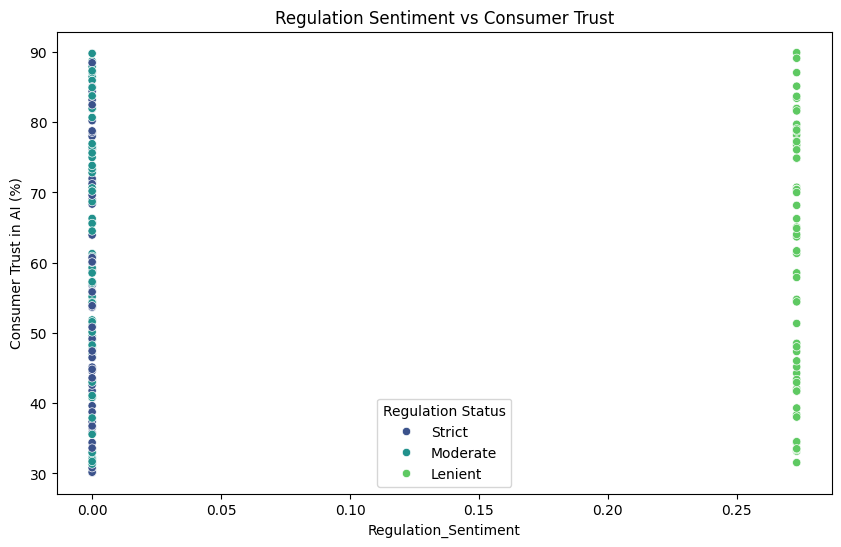

In [7]:
# Visualization 2: Sentiment vs Consumer Trust
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Regulation_Sentiment',
    y='Consumer Trust in AI (%)',
    hue='Regulation Status',
    data=df,
    palette='viridis'
)
plt.title('Regulation Sentiment vs Consumer Trust')
plt.show()

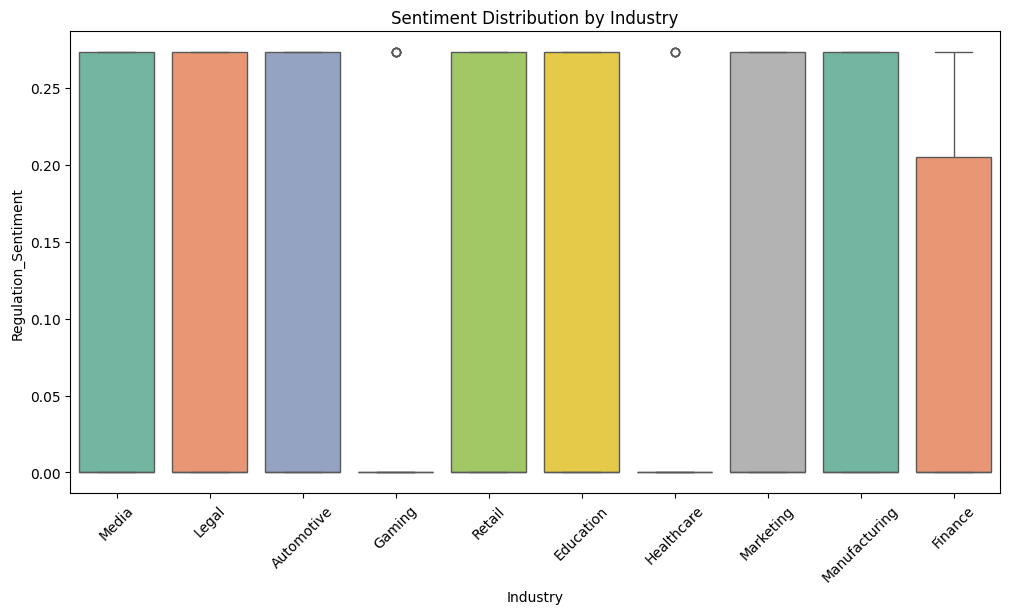

In [8]:
# Advanced: Compare sentiment by industry
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Industry',
    y='Regulation_Sentiment',
    hue='Industry',  # Added hue parameter
    data=df,
    palette='Set2',
    legend=False  # Disabled legend to avoid redundancy
)
plt.xticks(rotation=45)
plt.title('Sentiment Distribution by Industry')
plt.show()